In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read the input file and make sure to control how it is parsed into the dataframe
df = pd.io.parsers.read_csv(
    "^VIX.csv", 
    header=0, 
    delimiter=",", 
    index_col=0, 
    dtype = {"VIX Close": np.float64},
    parse_dates=True)

In [3]:
for x in df.columns:
    print "column name '{0}' and type {1}".format(x, type(df[x][0]))

column name 'Adj Close' and type <type 'numpy.float64'>
column name 'Adj Close 30 day MA' and type <type 'numpy.float64'>
column name 'pct_change' and type <type 'numpy.float64'>


In [4]:
df['pct_change'] = df['Adj Close'].pct_change().dropna()
'''
The following cuts out the data, after the dropna() to begin on 11-26-2013
#df['stdev21'] = pd.rolling_std(df['pct_change'], 21)
#df['hvol21'] = df['stdev21']*(252**0.5) # Annualize.
#df['variance'] = df['hvol21']**2
#df = df.dropna() # Remove rows with blank cells.
'''
print df.head(1)
print df.tail(1)

            Adj Close  Adj Close 30 day MA  pct_change
Date                                                  
2013-10-28      13.31                  NaN         NaN
            Adj Close  Adj Close 30 day MA  pct_change
Date                                                  
2016-03-07      17.35               21.614    0.029063


In [24]:
import arch
returns = df['pct_change'].dropna()
am = arch.univariate.ConstantMean(returns)
am.volatility = arch.univariate.GARCH(1,0,1)
am.distribution = arch.univariate.Normal()
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -682.58357392
Iteration:      2,   Func. Count:     17,   Neg. LLF: -682.876284392
Iteration:      3,   Func. Count:     25,   Neg. LLF: -682.953021287
Iteration:      4,   Func. Count:     33,   Neg. LLF: -682.982381962
Iteration:      5,   Func. Count:     40,   Neg. LLF: -683.191461029
Iteration:      6,   Func. Count:     47,   Neg. LLF: -683.381427785
Iteration:      7,   Func. Count:     54,   Neg. LLF: -683.538189135
Iteration:      8,   Func. Count:     61,   Neg. LLF: -683.677262506
Iteration:      9,   Func. Count:     68,   Neg. LLF: -683.735219909
Iteration:     10,   Func. Count:     75,   Neg. LLF: -683.813325195
Iteration:     11,   Func. Count:     81,   Neg. LLF: -683.843713448
Iteration:     12,   Func. Count:     87,   Neg. LLF: -683.876770719
Iteration:     13,   Func. Count:     93,   Neg. LLF: -683.879250747
Iteration:     14,   Func. Count:     99,   Neg. LLF: -683.87997163
Iteration:     15,   Func. Count:   

In [25]:
res.params

mu          0.001429
omega       0.000959
alpha[1]    0.169703
beta[1]     0.686990
Name: params, dtype: float64

In [6]:
garch_result_py = np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])

#below are the parameters that excel produces with solver
garch_result_xls = np.sqrt(0.002760 +  0.262033  * res.resid**2 + res.conditional_volatility**2 * 0.284771)

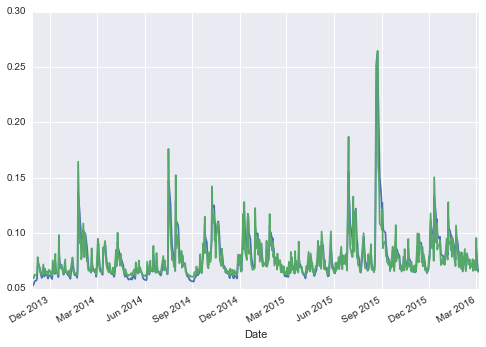

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sb  
sb.set_style('darkgrid')
#import matplotlib as mpl
garch_result_py.plot()
garch_result_xls.plot()

In [8]:
import math
for x in garch_result_py.tail(2).values:
    print "std. dev. = {0} and variance = {1}".format(x, x**2)

std. dev. = 0.0681210419227 and variance = 0.00464047635264
std. dev. = 0.0653957632044 and variance = 0.00427660584509


In [10]:
# Maximum likelyhood
#http://dan.iel.fm/emcee/current/user/line/

In [11]:
garch_result_py.tail(1).index[0].strftime("%Y-%m-%d")

'2016-03-07'

In [12]:
garch_result_py.tail(4).values

array([ 0.07896306,  0.07309138,  0.06812104,  0.06539576])

In [13]:
# what would the garch results be yesterday?
returns2 = df['pct_change'][:-1].dropna()
am = arch.univariate.ConstantMean(returns2)
am.volatility = arch.univariate.GARCH(1,0,1)
am.distribution = arch.univariate.Normal()
res = am.fit()
res.params

Iteration:      1,   Func. Count:      6,   Neg. LLF: -680.888696469
Iteration:      2,   Func. Count:     17,   Neg. LLF: -681.180747541
Iteration:      3,   Func. Count:     25,   Neg. LLF: -681.245628521
Iteration:      4,   Func. Count:     33,   Neg. LLF: -681.27789869
Iteration:      5,   Func. Count:     40,   Neg. LLF: -681.490475828
Iteration:      6,   Func. Count:     47,   Neg. LLF: -681.682444581
Iteration:      7,   Func. Count:     54,   Neg. LLF: -681.848394233
Iteration:      8,   Func. Count:     61,   Neg. LLF: -681.988656365
Iteration:      9,   Func. Count:     68,   Neg. LLF: -682.034648724
Iteration:     10,   Func. Count:     75,   Neg. LLF: -682.11231312
Iteration:     11,   Func. Count:     82,   Neg. LLF: -682.190747369
Iteration:     12,   Func. Count:     88,   Neg. LLF: -682.194846605
Iteration:     13,   Func. Count:     94,   Neg. LLF: -682.195444781
Iteration:     14,   Func. Count:    100,   Neg. LLF: -682.195496914
Iteration:     15,   Func. Count:   

mu          0.001400
omega       0.000958
alpha[1]    0.169174
beta[1]     0.688043
Name: params, dtype: float64

In [14]:
'''
the estimate for the same day is different if you get it at differnt times since the parameters are different.
Example: today is 20151211 and if I get the garch(1,1) estimates for:
returns = df['pct_change'].dropna() # the entire file
returns2 = df['pct_change'][:-1].dropna() # the entire file minus the most recent pct_change you get:

garch_result_py.tail(4).values
array([ 0.09957115,  0.0884386 ,  0.08710699,  0.07221464])
vs
garch_result_py_t_1.tail(4).values
array([ 0.07383632,  0.09977361,  0.08865689,  0.0872831 ])

Look at the penultimate value in the first array, 0.08710699
versus the last value in the last array, 0.0872831

The values are very close and although you are using the same data, the extra value in the first case changes 
your parameters and ultimately your results
'''
garch_result_py_t_1 = np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])
garch_result_py_t_1.tail(4).values

array([ 0.08578617,  0.0789862 ,  0.07314066,  0.06818933])